# Tutorial Overview
This set of two tutorials (`uncertaintyforest_running_example.ipynb` and `uncertaintyforest_fig1.ipynb`) will explain the UncertaintyForest class. After following both tutorials, you should have the ability to run UncertaintyForest code on your own machine and generate Figure 1 from [this paper](https://arxiv.org/pdf/1907.00325.pdf). 

If you haven't seen it already, take a look at other tutorials to setup and install the progressive learning package `Installation-and-Package-Setup-Tutorial.ipynb`

# Analyzing the UncertaintyForest Class by Reproducing Figure 1
## *Goal: Run the UncertaintyForest class to produce the results from Figure 1*
*Note: Figure 1 refers to Figure 1 from [this paper](https://arxiv.org/pdf/1907.00325.pdf)*

### First, we'll import the necessary packages that will be required

In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from proglearn.forest import KDF
from functions.unc_forest_tutorials_functions import generate_data, estimate_posterior, plot_posterior,  plot_variance,  plot_fig1

### Now, we'll specify some parameters 

In [6]:
# The following are two sets of parameters.
# The first are those that were actually used to produce figure 1.
# These take a long time to actually run since there are 6000 data points.
# Below those, you'll find some testing parameters so that you can see the results quicker.

# Here are the "Real Parameters"
#n = 6000
#mean = 1
#var = 1
#num_trials = 100 
#X_eval = np.linspace(-2, 2, num = 30).reshape(-1, 1)
#n_estimators = 300
#num_plotted_trials = 10

# Here are the "Test Parameters"
n = 300 # number of data points
mean = 1 # mean of the data
var = 1 # variance of the data
num_trials = 3 # number of trials to run
X_eval = np.linspace(-2, 2, num = 10).reshape(-1, 1) # the evaluation span (over X) for the plot
n_estimators = 20 # the number of estimators
num_plotted_trials = 2 # the number of "fainter" lines to be displayed on the figure

### Now, we'll specify which learners we'll compare. Figure 1 uses three different learners specified below.

In [7]:
# Algorithms used to produce figure 1
algos = [
    {
        'instance': RandomForestClassifier(n_estimators = n_estimators),
        'label': 'CART',
        'title': 'CART Forest',
        'color': "#1b9e77",
    },
    {
        'instance': CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators = n_estimators // 5), 
                                           method='isotonic', 
                                           cv = 5),
        'label': 'IRF',
        'title': 'Isotonic Reg. Forest',
        'color': "#fdae61",
    },
    {
        'instance': KDF(n_estimators = n_estimators),
        'label': 'UF',
        'title': 'Uncertainty Forest',
        'color': "#F41711",
    },
]

# Plotting parameters
parallel = True

### Now, we'll run the code to obtain the results that will be displayed in Figure1

In [8]:
# This is the code that actually generates data and predictions.
for algo in algos:
    algo['predicted_posterior'] = estimate_posterior(algo, n, mean, var, num_trials, X_eval, parallel = parallel)

### Finally, create figure 1.

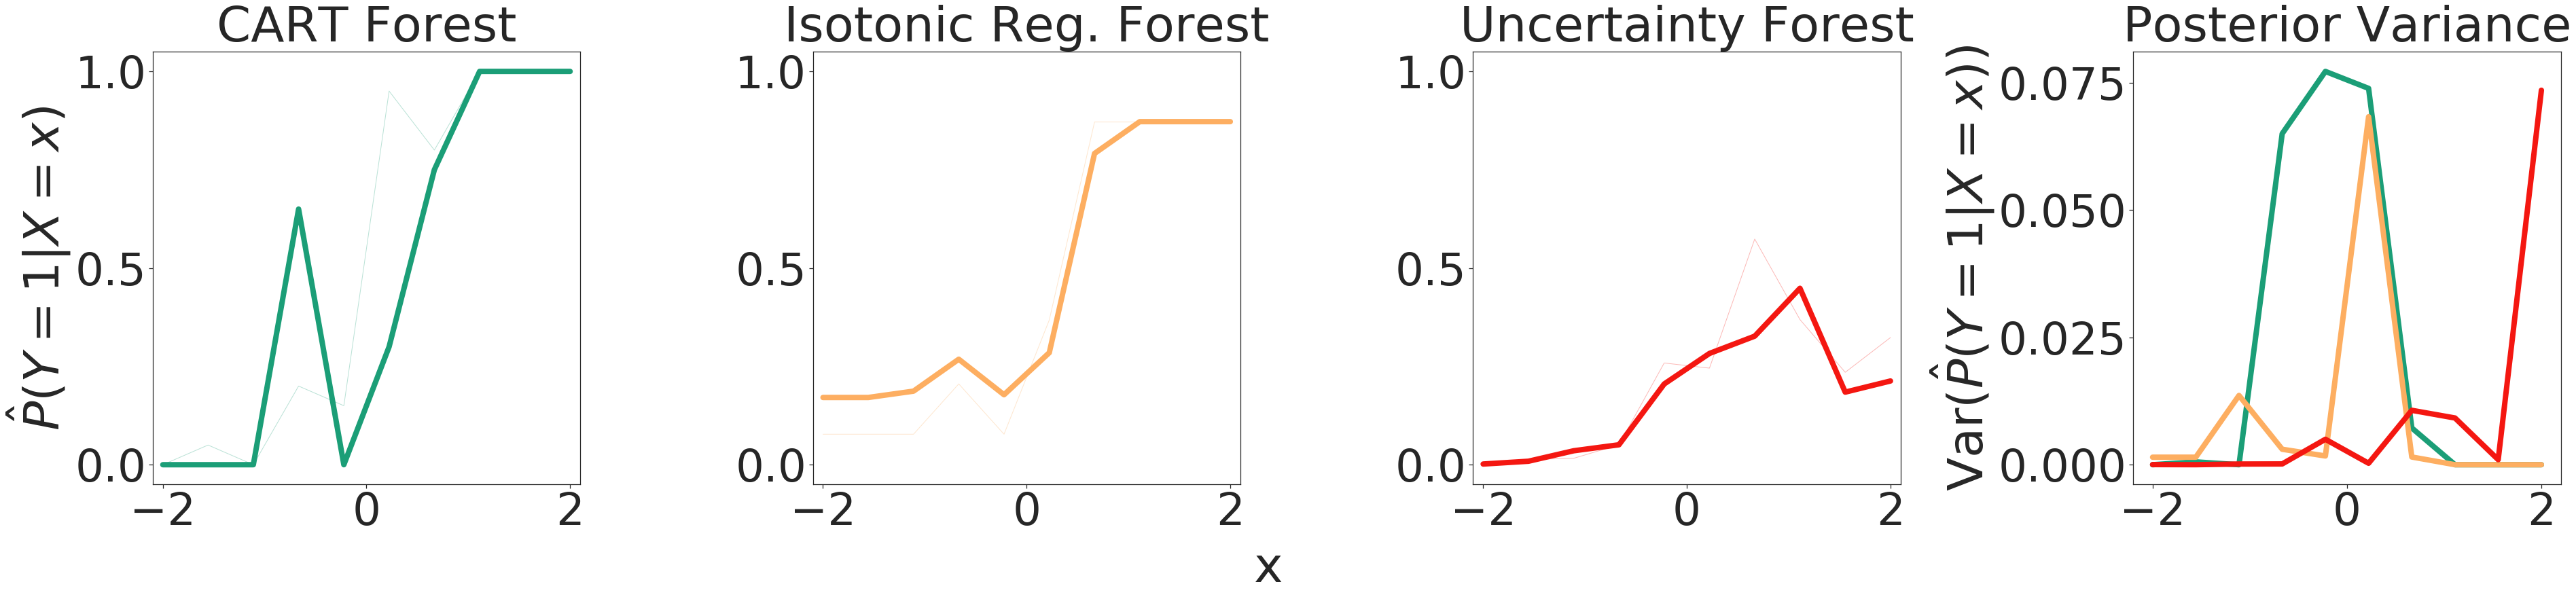

In [9]:
plot_fig1(algos, num_plotted_trials, X_eval)